<a href="https://colab.research.google.com/github/SourabhMagadum/Hindi-Sentiment-Analysis/blob/master/Hindi_sentiment_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, GRU 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from tensorflow.python.keras import layers
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from numpy.random import seed
seed(1)
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
from google.colab import files
uploaded = files.upload()


Saving emotions.csv to emotions (9).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['emotions.csv']))


In [5]:
df.head()

,Sentences,Label
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,angry
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,angry
2,क्या बेकार की बातें कर रहे हो,angry
3,क्या बताओ यार मूड ही ख़राब है,angry
4,आप ऐसे कैसे मेरा पैसा काट सकते हो,angry


In [6]:
df.shape

(513, 2)

In [0]:
y = df["Label"]
X = df.drop(["Label"], axis = 1)

In [8]:
# 70/15/15 train/test/val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

X_train.head()

,Sentences
171,आये होये ! ! ! आज तो तूने दिल जीत लिया भाई
226,शुक्रिया तुम्हारा
24,यार बार बार इंडिका ही क्यों बुक होता है
33,ऐसे कैसे चैनल्स बंद कर दिए आप
167,वाह ! ! ! सस्ती चीज बता दी यार


In [0]:
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')

all_sentences = X_train + X_test + X_val

tk.fit_on_texts(X['Sentences'])

# + 1 for unknown token
vocab_size = len(tk.word_index) +1

X_train_seq = tk.texts_to_sequences(X_train['Sentences'])
X_test_seq = tk.texts_to_sequences(X_test['Sentences'])
X_val_seq = tk.texts_to_sequences(X_val['Sentences'])
# Initializing max length of sentence to 20 words
max_length = 20

In [10]:
tk.word_index

{'10': 336,
 'अंतिम': 292,
 'अंदर': 606,
 'अकाउंट': 47,
 'अगले': 566,
 'अगेंस्ट': 430,
 'अच्छा': 27,
 'अच्छी': 152,
 'अच्छे': 269,
 'अजीब': 399,
 'अनसैटिस्फाइड': 640,
 'अनुभव': 601,
 'अपना': 224,
 'अपनी': 340,
 'अपने': 109,
 'अप्प': 249,
 'अब': 160,
 'अबे': 93,
 'अभी': 101,
 'अरे': 51,
 'अल्लाह': 285,
 'अवेलेबल': 310,
 'अहमदाबाद': 553,
 'आ': 38,
 'आई': 636,
 'आए': 677,
 'आएँगे': 593,
 'आएगा': 175,
 'आओ': 392,
 'आखरी': 511,
 'आखिरकार': 268,
 'आगे': 304,
 'आज': 60,
 'आजका': 635,
 'आता': 234,
 'आती': 372,
 'आने': 543,
 'आप': 92,
 'आपकी': 477,
 'आपसे': 206,
 'आय': 281,
 'आया': 74,
 'आये': 457,
 'आर': 282,
 'आश्चर्यचकित': 483,
 'आस': 306,
 'इंटरफ़ेस': 375,
 'इंटरफ़ेस': 395,
 'इंटेलीजेंट': 468,
 'इंडिका': 353,
 'इंतज़ार': 368,
 'इडियट': 350,
 'इतना': 90,
 'इतनी': 154,
 'इतने': 144,
 'इत्ता': 439,
 'इधर': 124,
 'इन': 290,
 'इनका': 329,
 'इनके': 219,
 'इम्प्रूव': 642,
 'इम्प्रेस्सड': 471,
 'इलाके': 564,
 'इस': 89,
 'इसके': 665,
 'इसको': 580,
 'इसे': 363,
 'इस्तेमाल': 576,
 'उतना': 652,
 'उतार':

In [11]:
print(vocab_size)


686


In [12]:
X_train_seq

[[457, 458, 60, 34, 81, 196, 267, 150, 36],
 [145, 75],
 [5, 22, 22, 353, 33, 45, 19, 176, 1],
 [125, 30, 88, 135, 6, 231, 92],
 [59, 192, 235, 222, 140, 5],
 [51, 7, 30, 94, 5],
 [2, 459, 6, 57, 81],
 [99, 402, 10, 403, 3, 95, 40],
 [5, 54, 94, 42, 21, 47, 14],
 [11, 147, 270, 190, 1],
 [305, 12, 212, 10, 209, 12, 79, 43, 52, 1],
 [7, 2, 132, 1],
 [223, 336, 22, 220, 12, 1, 337, 41, 338, 4, 339, 25],
 [13, 40, 325, 18, 293, 10, 4, 16],
 [40, 43, 71, 10, 116, 239, 1, 539],
 [149, 11, 65, 6, 131, 15, 12],
 [96, 182, 71, 550, 112, 120, 105],
 [15, 98, 56, 161, 651, 10, 55, 4, 12],
 [93, 42, 6, 225, 226, 10],
 [51, 7, 88, 45, 4, 38, 25, 427],
 [240],
 [13, 10, 628, 27, 4, 16],
 [2, 26, 11, 20, 555],
 [5, 2, 132, 6, 67, 3, 17],
 [2, 132, 228, 359],
 [122, 18, 46, 58],
 [2, 478, 20, 80, 1, 36],
 [196, 267, 150, 81],
 [40, 43, 14, 308, 211, 70],
 [124, 153, 121, 39, 2, 562],
 [113, 34, 20, 18, 392, 17],
 [28, 9, 547, 18, 46, 48, 41, 19, 6, 64],
 [13, 34, 102, 1],
 [11, 545, 19, 70],
 [29, 26

In [0]:
X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')


In [0]:
#padding the sequences to make all the input sequences of the same length
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh = to_categorical(y_val_le)

In [15]:
X_train_seq_pad

array([[457, 458,  60, ...,   0,   0,   0],
       [145,  75,   0, ...,   0,   0,   0],
       [  5,  22,  22, ...,   0,   0,   0],
       ...,
       [ 96, 192,  28, ...,   0,   0,   0],
       [237,  77,  11, ...,   0,   0,   0],
       [119,  32, 192, ...,   0,   0,   0]], dtype=int32)

In [16]:
emb_dims = 256

model = Sequential()
model.add(Embedding(vocab_size, emb_dims, input_length=max_length, embeddings_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(LSTM(units = 16, dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_seq_pad, y_train_oh, epochs = 128, batch_size = 256, validation_data=(X_val_seq_pad, y_val_oh), shuffle=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 370 samples, validate on 66 samples
Epoch 1/128
370/370 [==============================] - 1s 3ms/sample - loss: 1.4021 - acc: 0.2297 - val_loss: 1.4013 - val_acc: 0.1212
Epoch 2/128
370/370 [==============================] - 0s 232us/sample - loss: 1.3962 - acc: 0.2757 - val_loss: 1.3984 - val_acc: 0.1212
Epoch 3/128
370/370 [==============================] - 0s 222us/sample - loss: 1.3924 - acc: 0.2811 - val_loss: 1.3958 - val_acc: 0.1212
Epoch 4/128
370/370 [==============================] - 0s 282us/sample - loss: 1.3898 - acc: 0.2784 - val_loss: 1.3937 - val_acc: 0.1212
Epoch 5/128
370/370 [==============================] - 0s 220us/sample - loss: 1.3866 - acc: 0.2838 - val_loss: 1.39

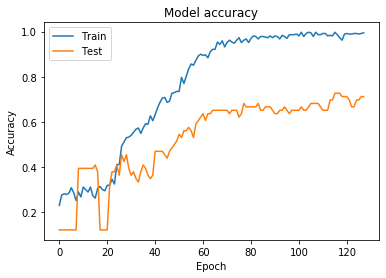

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 256)           175616    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                17472     
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
Total params: 193,156
Trainable params: 193,156
Non-trainable params: 0
_________________________________________________________________


In [19]:
results = model.evaluate(X_test_seq_pad, y_test_oh)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

77/77 [==============================] - 0s 504us/sample - loss: 1.9065 - acc: 0.6104
/n
Test accuracy of word embeddings model: 61.04%
